In [1]:
import os
import sys

import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.stats import zscore

from tqdm import tqdm

import neuroseries as nts


import time
import matplotlib.pyplot as plt
# %matplotlib qt
import seaborn as sns

import bk.load
import bk.compute
import bk.plot
import bk.signal


In [2]:
bk.load.current_session_linux()
lfp = bk.load.lfp(23)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713


In [3]:
states = bk.load.states()
# states['sleep'] = states['Rem'].union(states['sws'])
# lfp = lfp.restrict(states['sleep'])

In [5]:
sys.getsizeof(lfp)/1_000_000

0.000104

In [30]:
%matplotlib qt
fig ,ax = plt.subplot_mosaic('''
A
A
A
A
B''')
f,t,sxx = scipy.signal.spectrogram(lfp,fs = 1250,nperseg=1250*10,noverlap=1250*7.5)
sxx = sxx[f<10,:]
ax['A'].imshow(np.corrcoef(sxx.T),extent=[t[0],t[-1],t[-1],t[0]],aspect = 'auto')
ax['A'].sharex(ax['B'])
plt.sca(ax['B'])
bk.plot.intervals(states['Rem'])
bk.plot.intervals(states['sws'],'grey')

9069

In [14]:
plt.pcolormesh(t,f[f<10],np.log(sxx),rasterized = True)


/tmp/ipykernel_3964/2796871811.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f[f<10],np.log(sxx),rasterized = True)


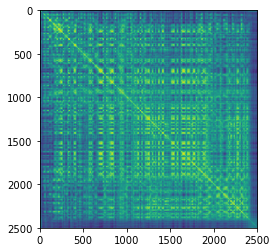

In [18]:
1134*20*1250

28350000

In [19]:
len(lfp)

28350000

In [23]:
np.corrcoef(sxx.T)

array([[1.        , 0.90684255, 0.58017446, ..., 0.63161172, 0.61089296,
        0.63194924],
       [0.90684255, 1.        , 0.57198738, ..., 0.65273113, 0.71033282,
        0.62224019],
       [0.58017446, 0.57198738, 1.        , ..., 0.56755392, 0.63619771,
        0.58554525],
       ...,
       [0.63161172, 0.65273113, 0.56755392, ..., 1.        , 0.71795133,
        0.53164781],
       [0.61089296, 0.71033282, 0.63619771, ..., 0.71795133, 1.        ,
        0.67090061],
       [0.63194924, 0.62224019, 0.58554525, ..., 0.53164781, 0.67090061,
        1.        ]])